In [ ]:
from google.colab import drive
drive.mount('//content//drive')

Drive already mounted at //content//drive; to attempt to forcibly remount, call drive.mount("//content//drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/drive/MyDrive/padded images/Train'
validation_dir = '/content/drive/MyDrive/padded images/Validation'
import os
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Train directory not found: {train_dir}")


train_datagen = ImageDataGenerator(
    rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)




In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode="grayscale",
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',


)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    color_mode="grayscale",
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',

)


Found 151646 images belonging to 3 classes.
Found 15114 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
model = Sequential([


# الطبقات التلافيفية والتجميعية
Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)),
Conv2D(64, (3, 3), activation='relu', padding='same'),
MaxPooling2D((2, 2), strides=(2, 2)),

Conv2D(128, (3, 3), activation='relu', padding='same'),
Conv2D(128, (3, 3), activation='relu', padding='same'),
MaxPooling2D((2, 2), strides=(2, 2)),

Conv2D(256, (3, 3), activation='relu', padding='same'),
Conv2D(256, (3, 3), activation='relu', padding='same'),
Conv2D(256, (3, 3), activation='relu', padding='same'),
MaxPooling2D((2, 2), strides=(2, 2)),

Conv2D(512, (3, 3), activation='relu', padding='same'),
Conv2D(512, (3, 3), activation='relu', padding='same'),
Conv2D(512, (3, 3), activation='relu', padding='same'),
MaxPooling2D((2, 2), strides=(2, 2)),

Conv2D(512, (3, 3), activation='relu', padding='same'),
Conv2D(512, (3, 3), activation='relu', padding='same'),
Conv2D(512, (3, 3), activation='relu', padding='same'),
MaxPooling2D((2, 2), strides=(2, 2)),

# الطبقات المترابطة بالكامل
Flatten(),
Dense(4096, activation='relu'),
Dense(4096, activation='relu'),
Dense(3, activation='softmax')
])
# طباعة ملخص النموذج



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 32, 32, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,608,387 (128.21 MB)

 Trainable params: 33,608,387 (128.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)


history= model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=20,
    callbacks=[checkpoint]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.4374 - loss: 1.0913 
Epoch 1: val_loss improved from inf to 1.08548, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 1000s 43s/step - accuracy: 0.4368 - loss: 1.0914 - val_accuracy: 0.4250 - val_loss: 1.0855
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.3968 - loss: 1.0908 
Epoch 2: val_loss improved from 1.08548 to 1.08509, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 741s 39s/step - accuracy: 0.3975 - loss: 1.0907 - val_accuracy: 0.4125 - val_loss: 1.0851
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.4297 - loss: 1.0797 
Epoch 3: val_loss improved from 1.08509 to 1.07702, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 636s 33s/step - accuracy: 0.4287 - loss: 1.0800 - val_accuracy: 0.4563 - val_loss: 1.0770
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.4031 - loss: 1.0868 
Epoch 4: val_loss improved from 1.07702 to 1.07159, saving model to 

In [ ]:
model.save('my_model.keras')
test_dir='/content/drive/MyDrive/padded images/Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    color_mode="grayscale",
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',


)

Found 56723 images belonging to 3 classes.


In [ ]:
model.evaluate(
    test_generator,
    batch_size=40,
    steps=20,

)

20/20 ━━━━━━━━━━━━━━━━━━━━ 385s 20s/step - accuracy: 0.4003 - loss: 1.0905


[1.1022017002105713, 0.3671875]

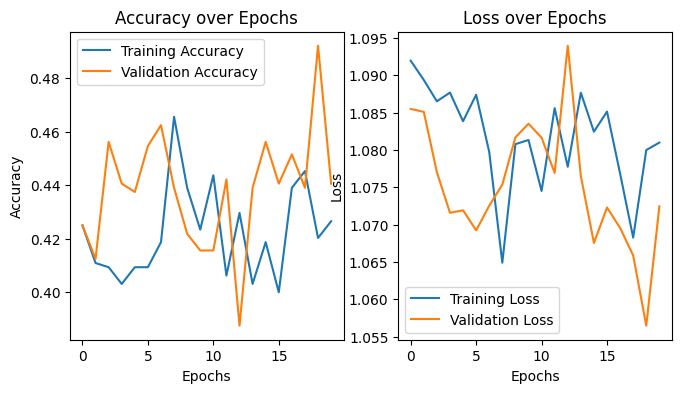

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()
